In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats

from tqdm import tqdm
from multiprocessing import Pool

In [2]:
df = pd.read_pickle('../data/watch_list_clean.pkl.xz')

## Normalize User Ratings to their own rating behavior

In [3]:
df.head()

,title,url,username,status,times_watched,user_rating,num_eps,is_ongoing,duration,studio,start_year,end_year,season,avg_rating,num_votes,synopsis,tags,content_warnings
0,Day Break Illusion: il sole penetra le illusioni,https://www.anime-planet.com/anime/day-break-i...,Ruth,Watched,1,3.0,13,False,NaN,AIC,2013.0,2013.0,Summer,3.158,1980,Akari has always known two things: she’s a ski...,"[Drama, Fantasy, Horror, Magical Girl, Contemp...",None
1,Dog Days,https://www.anime-planet.com/anime/dog-days,Ruth,Watched,1,3.5,13,False,NaN,Seven Arcs,2011.0,2011.0,Spring,3.524,9447,"In the magical land of Flonyard, animal-eared ...","[Action, Adventure, Ecchi, Fantasy, Animal Cha...",None
2,Dog Days',https://www.anime-planet.com/anime/dog-days-2,Ruth,Watched,1,3.0,13,False,NaN,Seven Arcs,2012.0,2012.0,Summer,3.651,5345,Three months have passed since Shinku returned...,"[Action, Adventure, Ecchi, Fantasy, Animal Cha...",None
3,Fantasista Doll,https://www.anime-planet.com/anime/fantasista-...,Ruth,Watched,1,2.5,12,False,NaN,Hoods Entertainment,2013.0,2013.0,Summer,2.918,1206,Uzume Uno was on her way to class one day when...,"[Magical Girl, Sci Fi, Seinen, Slice of Life, ...",None
4,Fate/Kaleid Liner Prisma Illya,https://www.anime-planet.com/anime/fate-kaleid...,Ruth,Watched,1,3.5,10,False,NaN,SILVER LINK.,2013.0,2013.0,Summer,3.513,5655,Illya loves magical girls; but more than anyth...,"[Action, Fantasy, Magical Girl, Shounen, Conte...",None


In [25]:
def rating_normalizer(data):
    # min + ((max - min)/2)
    # 0.5 + ((5 - 0.5)/2)
    # 0.5 + 2.25 = 2.75
    # return (data * (2.75 / data.mean())).apply(lambda x: min(x, 5))
    normalized = ((data - data.mean()) / (data.max() - data.min())).replace()
    return 

In [26]:
df['adj_user_rating'] = df.groupby('username')['user_rating'].apply(rating_normalizer)

In [27]:
df['adj_user_rating'].agg(['min', 'max'])

min   -0.998703
max    0.990909
Name: adj_user_rating, dtype: float32

In [28]:
df['adj_user_rating']

0         -0.126016
1         -0.014905
2         -0.126016
3         -0.237127
4         -0.014905
             ...   
9205629    0.233871
9205630    0.233871
9205631    0.233871
9205632    0.233871
9205633    0.233871
Name: adj_user_rating, Length: 9205634, dtype: float32

(-1.1, 1.1)

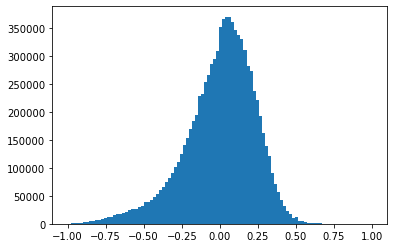

In [29]:
plt.hist(df['adj_user_rating'], bins=100)
plt.xlim(-1.1, 1.1)

<AxesSubplot:xlabel='adj_user_rating'>

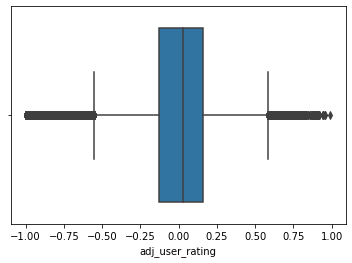

In [30]:
sns.boxplot(data=df, x='adj_user_rating')

In [31]:
df['adj_user_rating'].value_counts(dropna=False).sort_index()

-0.998703        1
-0.998241        1
-0.997685        1
-0.997334        1
-0.997268        1
             ...  
 0.945896        7
 0.956522        1
 0.956522        1
 0.990909        1
 NaN         96511
Name: adj_user_rating, Length: 247197, dtype: int64

## Normalize Average Ratings

In [24]:
df['avg_rating']

0          3.158
1          3.524
2          3.651
3          2.918
4          3.513
           ...  
9205629    4.227
9205630    4.308
9205631    4.187
9205632    4.210
9205633    4.396
Name: avg_rating, Length: 9205634, dtype: float32